# Data Analysis (creating questions & stories) Week 5

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from textblob import TextBlob

In [5]:
file_path = 'twcs.csv'
data_set = pd.read_csv('twcs.csv')

'''
Data Analysis steps:
1. Define the question
2. Define the ideal data set
3. Obtain data
4. Clean the data
5. Exploratory Data Analysis
6. Statistical Prediction/modeling
7. Interpret results
8. Challenge results
9. Communicate results
10. Build a Data Product

'''

'''
NOTES
Example data question topics: focus on the right features of the data.
- airlines (delta, american airlines)
- telecommunication comapanies (t-mobile, sprint)
'''

In [ ]:
                    ////////////// Telecommunication data analysis //////////////

'''
Step 1 - Define the questions:
What are the most common issues customer are facing based on their tweets to telecommunication companies?
How does response time correlate to customer satisfaction? 

Step 2 - Define the ideal data set:
Telecommunication companies such as VerizonSupport, Ask_Spectrum, sprintcare, ect.
'''

In [6]:
# Step 3 - Obtain the data
data_set.head(50)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0


In [7]:
# Step 4 - Clean the data

In [8]:
# Handle missing values
data_set.dropna(subset=['text'], inplace=True)

In [9]:
# Convert 'created_at' to datetime
data_set['created_at'] = pd.to_datetime(data_set['created_at'])

In [10]:
# TODO more data cleaning

In [11]:
# Step 5 - Exploratory data analysis

In [82]:
# Explore distribution of inbound and outbound tweets
inbound_outbound_counts = data_set['inbound'].value_counts()

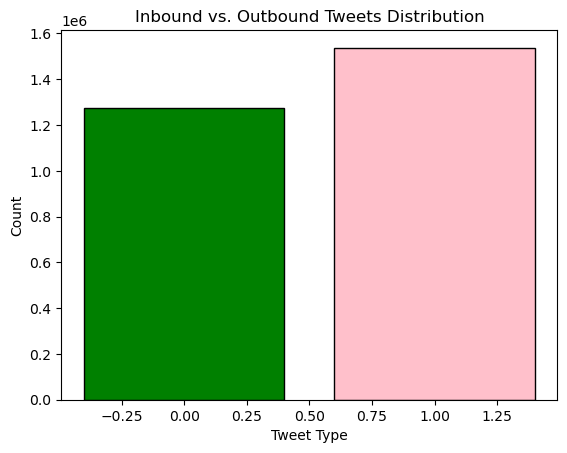

In [84]:
# Plot bar chart
plt.bar(inbound_outbound_counts.keys(), inbound_outbound_counts.values, color=['pink', 'green'], edgecolor='black') 
plt.xlabel('Tweet Type')
plt.ylabel('Count')
plt.title('Inbound vs. Outbound Tweets Distribution')
plt.show()

In [28]:
# Sentiment analysis 

In [ ]:
def sentiment_analysis(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
data_set['sentiment'] = data_set['text'].apply(sentiment_analysis)

# Count the occurrences of each sentiment category
sentiment_counts = data_set['sentiment'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'pink', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')
plt.show()

Step 6 - Statistical predictions & modeling

TODO - more data cleaning, analyze results & present them in an organized manner

In [ ]:
                      ////////////// Airline data analysis //////////////                      

1. Define the question
How does response time correlate to customer satisfaction when comparing American Airlines & Delta? 
2. Define the ideal data set
American Airlines and Delta 

Step 3. Clean the data

In [85]:
# Handle missing values
data_set['response_tweet_id'].fillna(-1, inplace=True)
data_set['in_response_to_tweet_id'].fillna(-1, inplace=True)

In [87]:
data_set

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,2017-10-31 22:10:47+00:00,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,2017-10-31 22:11:45+00:00,@sprintcare and how do you propose we do that,-1,1.0
2,3,115712,True,2017-10-31 22:08:27+00:00,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,2017-10-31 21:54:49+00:00,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,2017-10-31 21:49:35+00:00,@sprintcare I did.,4,6.0
...,...,...,...,...,...,...,...
2811769,2987947,sprintcare,False,2017-11-22 08:43:51+00:00,"@823869 Hey, we'd be happy to look into this f...",-1,2987948.0
2811770,2987948,823869,True,2017-11-22 08:35:16+00:00,@115714 wtf!? I’ve been having really shitty s...,2987947,-1.0
2811771,2812240,121673,True,2017-11-23 04:13:07+00:00,@143549 @sprintcare You have to go to https://...,-1,2812239.0
2811772,2987949,AldiUK,False,2017-11-22 08:31:24+00:00,"@823870 Sounds delicious, Sarah! 😋 https://t.c...",-1,2987950.0


In [90]:
# Step 3. Obtain specific data
filtered_data = data_set[data_set['author_id'].str.contains('delta|american', case=False)]

In [91]:
filtered_data

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
315,609,Delta,False,2016-08-06 01:44:03+00:00,"@115818 Glad to check. Pls, DM your confirmati...",610,611.0
484,790,Delta,False,2017-10-31 22:27:38+00:00,@115882 I'm sorry. The earlier flight may not ...,791,792.0
486,793,Delta,False,2017-10-31 22:52:37+00:00,@115882 My apologies. If that flight never sho...,-1,791.0
488,794,Delta,False,2017-10-31 22:25:31+00:00,@115883 Please share additional details about ...,795,796.0
490,797,Delta,False,2017-10-31 23:07:41+00:00,@115883 Please do. *AFC https://t.co/6iDGBJAc2m,798,795.0
...,...,...,...,...,...,...,...
2811590,2987770,AmericanAir,False,2017-10-31 22:10:35+00:00,@823815 Here at American we want everyone to f...,2987771,2987772.0
2811593,2987773,AmericanAir,False,2017-10-31 22:06:33+00:00,@323286 We're sorry for any difficulties that ...,-1,2987774.0
2811595,2987775,AmericanAir,False,2017-10-31 22:01:11+00:00,"@823817 We care. If you'd like, please share y...",-1,2987776.0
2811597,2987777,AmericanAir,False,2017-10-31 22:01:03+00:00,@115892 Looks like you have a pretty good view...,-1,2987778.0


In [92]:
# Remove duplicates in the filtered data 
filtered_data = filtered_data.drop_duplicates().copy()

In [93]:
filtered_data

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
315,609,Delta,False,2016-08-06 01:44:03+00:00,"@115818 Glad to check. Pls, DM your confirmati...",610,611.0
484,790,Delta,False,2017-10-31 22:27:38+00:00,@115882 I'm sorry. The earlier flight may not ...,791,792.0
486,793,Delta,False,2017-10-31 22:52:37+00:00,@115882 My apologies. If that flight never sho...,-1,791.0
488,794,Delta,False,2017-10-31 22:25:31+00:00,@115883 Please share additional details about ...,795,796.0
490,797,Delta,False,2017-10-31 23:07:41+00:00,@115883 Please do. *AFC https://t.co/6iDGBJAc2m,798,795.0
...,...,...,...,...,...,...,...
2811590,2987770,AmericanAir,False,2017-10-31 22:10:35+00:00,@823815 Here at American we want everyone to f...,2987771,2987772.0
2811593,2987773,AmericanAir,False,2017-10-31 22:06:33+00:00,@323286 We're sorry for any difficulties that ...,-1,2987774.0
2811595,2987775,AmericanAir,False,2017-10-31 22:01:11+00:00,"@823817 We care. If you'd like, please share y...",-1,2987776.0
2811597,2987777,AmericanAir,False,2017-10-31 22:01:03+00:00,@115892 Looks like you have a pretty good view...,-1,2987778.0


In [57]:
# Convert 'response_tweet_id' and 'in_response_to_tweet_id' to numeric 
filtered_data['response_tweet_id'] = pd.to_numeric(filtered_data['response_tweet_id'], errors='coerce')
filtered_data['in_response_to_tweet_id'] = pd.to_numeric(filtered_data['in_response_to_tweet_id'], errors='coerce')

In [46]:
print(filtered_data)

         tweet_id    author_id  inbound                      created_at  \
315           609        Delta    False  Sat Aug 06 01:44:03 +0000 2016   
484           790        Delta    False  Tue Oct 31 22:27:38 +0000 2017   
486           793        Delta    False  Tue Oct 31 22:52:37 +0000 2017   
488           794        Delta    False  Tue Oct 31 22:25:31 +0000 2017   
490           797        Delta    False  Tue Oct 31 23:07:41 +0000 2017   
...           ...          ...      ...                             ...   
2811590   2987770  AmericanAir    False  Tue Oct 31 22:10:35 +0000 2017   
2811593   2987773  AmericanAir    False  Tue Oct 31 22:06:33 +0000 2017   
2811595   2987775  AmericanAir    False  Tue Oct 31 22:01:11 +0000 2017   
2811597   2987777  AmericanAir    False  Tue Oct 31 22:01:03 +0000 2017   
2811599   2987779  AmericanAir    False  Tue Oct 31 22:00:40 +0000 2017   

                                                      text response_tweet_id  \
315      @115818 Gl

In [58]:
# Calculate response time
filtered_data['response_time'] = filtered_data['response_tweet_id'] - filtered_data['in_response_to_tweet_id']

In [59]:
print(filtered_data)

         tweet_id    author_id  inbound                created_at  \
315           609        Delta    False 2016-08-06 01:44:03+00:00   
484           790        Delta    False 2017-10-31 22:27:38+00:00   
486           793        Delta    False 2017-10-31 22:52:37+00:00   
488           794        Delta    False 2017-10-31 22:25:31+00:00   
490           797        Delta    False 2017-10-31 23:07:41+00:00   
...           ...          ...      ...                       ...   
2811590   2987770  AmericanAir    False 2017-10-31 22:10:35+00:00   
2811593   2987773  AmericanAir    False 2017-10-31 22:06:33+00:00   
2811595   2987775  AmericanAir    False 2017-10-31 22:01:11+00:00   
2811597   2987777  AmericanAir    False 2017-10-31 22:01:03+00:00   
2811599   2987779  AmericanAir    False 2017-10-31 22:00:40+00:00   

                                                      text  response_tweet_id  \
315      @115818 Glad to check. Pls, DM your confirmati...              610.0   
484      

In [61]:
# Calculate average response time for each airline
average_response_time = filtered_data.groupby('author_id')['response_time'].mean()

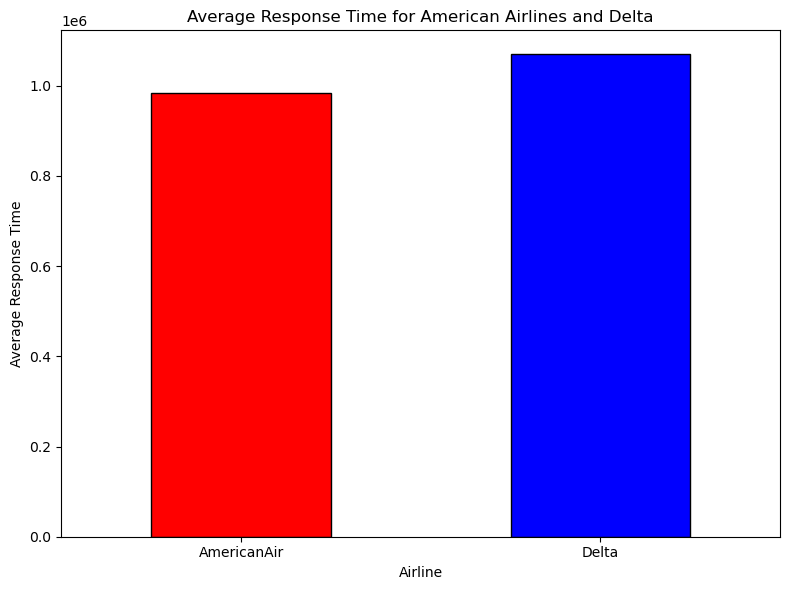

In [78]:
# Visualize the data
plt.figure(figsize=(8, 6))
colors = ['red', 'blue'] 
average_response_time.plot(kind='bar', color=colors, edgecolor='black') 
plt.title('Average Response Time for American Airlines and Delta')
plt.xlabel('Airline')
plt.ylabel('Average Response Time')
plt.xticks(range(len(average_response_time.index)), average_response_time.index, rotation=0)
plt.ylim(0)  
plt.tight_layout()  

Step 6. Statistical Prediction/modeling

In [66]:
correlation = filtered_data.corr(numeric_only=True)

In [71]:
filtered_data['response_time'] = filtered_data['response_tweet_id'] - filtered_data['in_response_to_tweet_id']

average_response_time = filtered_data.groupby('author_id')['response_time'].mean()

print(average_response_time)


author_id
AmericanAir   -9.832385e+05
Delta         -1.069096e+06
Name: response_time, dtype: float64


Convert to postive for better analysis of results

In [76]:
filtered_data['response_time'] = filtered_data['response_tweet_id'] - filtered_data['in_response_to_tweet_id']

average_response_time = filtered_data.groupby('author_id')['response_time'].mean().abs()

print(average_response_time)


author_id
AmericanAir    9.832385e+05
Delta          1.069096e+06
Name: response_time, dtype: float64


Results 
American Airlines with an average response time of approximately 983,238.5 units is faster than Delta with an average response time of approximately 1,069,096 units. This can correlate to customers being more satified with American Airlines customer support via the tweet data set. 